In [27]:
rawdata = read.table('GSE124731_single_cell_rnaseq_gene_counts.txt', header = 1, stringsAsFactors = FALSE, row.names = 1)

In [39]:
geneIDs1 <- ensembldb::select(EnsDb.Hsapiens.v86, keys= rownames(rawdata), keytype = "GENEID", columns = c("SYMBOL","GENEID"))
rawdata = rawdata[rownames(rawdata) %in% geneIDs1$GENEID,]
rawdata = rawdata[geneIDs1$GENEID[!duplicated(geneIDs1$SYMBOL)],]
geneIDs1 <- ensembldb::select(EnsDb.Hsapiens.v86, keys= rownames(rawdata), keytype = "GENEID", columns = c("SYMBOL","GENEID"))
rownames(rawdata) = geneIDs1$SYMBOL

In [41]:
source("../../functions.R")
setwd('Figures/Figure 3')
seurat = CreateSeuratObject(rawdata)
seurat = NormalizeData(seurat)

Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.5.3"Loading required package: cowplot
Warning message:
"package 'cowplot' was built under R version 3.5.3"
********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:S4Vectors':

    expand

Warning message:
"package 'feather' was built under R version 3.5.3"Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following object is masked from 'package:biomaRt':

    select

The following objects are masked from 'package:ensembldb':

    filter, select

The following object is masked from 'package:AnnotationDbi':

    select



In [44]:
seurat@meta.data$n_genes = seurat@meta.data$nGene
seurat = seuratProcess(seurat)

Regressing out: n_genes



Time Elapsed:  1.15900208155314 mins

Scaling data matrix


In [46]:
metadata = read.table('GSE124731_single_cell_rnaseq_meta_data.txt', header = 1, stringsAsFactors = FALSE, row.names = 1)

In [49]:
seurat@meta.data = metadata[seurat@cell.names,]

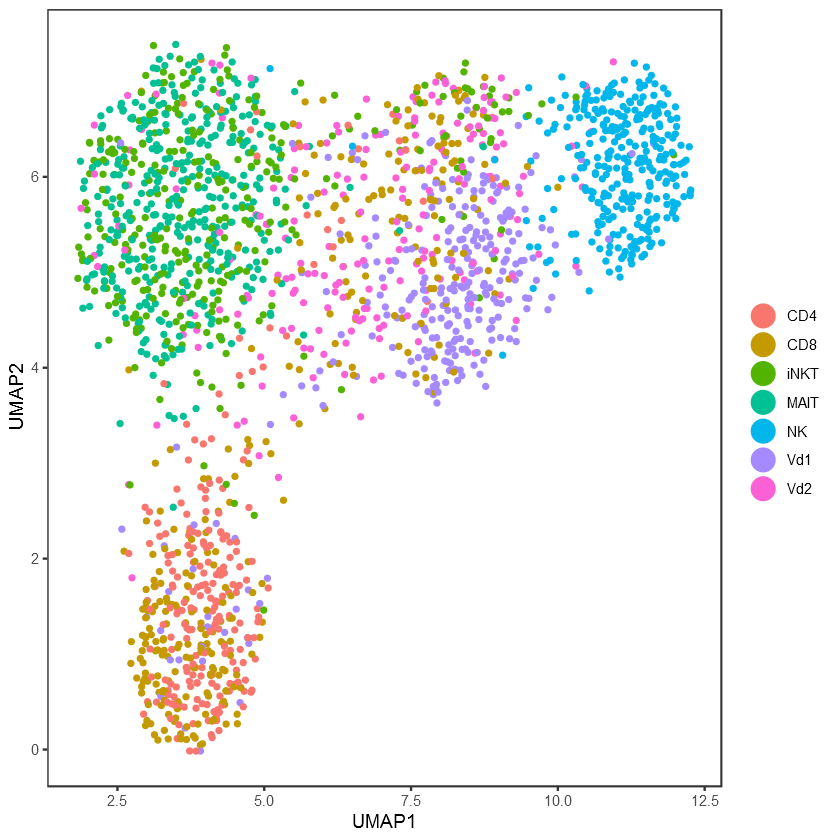

In [50]:
DimPlot(seurat, 'umap', group.by = 'cell.type')

In [61]:
table(seurat@ident)


 CD4  CD8 iNKT MAIT   NK  Vd1  Vd2 
 222  310  325  382  309  284  204 

In [71]:
inkt = FindMarkers(seurat, 'iNKT', test.use = 'wilcox')
nk = FindMarkers(seurat, 'NK', test.use = 'wilcox')
vd1 = FindMarkers(seurat, 'Vd1', test.use = 'wilcox')
vd2 = FindMarkers(seurat, 'Vd2', test.use = 'wilcox')
mait = FindMarkers(seurat, 'MAIT', test.use = 'wilcox')
gd = FindMarkers(seurat, c('Vd1', 'Vd2'), test.use = 'wilcox')
cd4 = FindMarkers(seurat, c('CD4'), test.use = 'wilcox')
cd8  = FindMarkers(seurat, c('CD8'), test.use = 'wilcox')
ab  = FindMarkers(seurat, c('CD4', 'CD8'), test.use = 'wilcox')

head(inkt, 20)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
KLRB1,1.042097e-57,0.6576709,0.994,0.846,3.493213e-53
TRAC,1.596590e-39,0.6855182,0.877,0.621,5.351930e-35
GZMK,4.255526e-32,0.5953897,0.714,0.365,1.426495e-27
IL7R,2.028471e-30,0.5683303,0.828,0.550,6.799638e-26
TRDC,2.385523e-28,-1.4148008,0.169,0.458,7.996513e-24
KLRD1,3.336465e-26,-0.9266543,0.338,0.611,1.118416e-21
TMSB10,1.816208e-23,-0.2990387,0.997,0.999,6.088110e-19
CMC1,1.934091e-23,-1.0089580,0.271,0.524,6.483267e-19
LTB,4.705415e-22,0.5220994,0.831,0.630,1.577302e-17
CD40LG,7.703007e-21,0.4806269,0.329,0.125,2.582125e-16


In [72]:
inkt$type = 'iNKT'
nk$type = 'NK'
vd1$type = 'vd1'
vd2$type = 'vd2'
mait$type = 'MAIT'
gd$type = 'gd'
cd4$type = 'CD4'
cd8$type = 'CD8'
ab$type = 'ab'

inkt$gene = rownames(inkt)
nk$gene = rownames(nk)
vd1$gene = rownames(vd1)
vd2$gene = rownames(vd2)
mait$gene = rownames(mait)
gd$gene = rownames(gd)
cd4$gene = rownames(cd4)
cd8$gene = rownames(cd8)
ab$gene = rownames(ab)


df = rbind(inkt, nk, vd1, vd2, mait, gd, cd4, cd8, ab)
write.table(df, sep = ',', 'innate_lists.csv')